# ANOVA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.stats as sm_stats
from scipy import stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

from statsmodels.stats.multicomp import MultiComparison, pairwise_tukeyhsd

## rozkład $F$-Snedecora
Zmienna losowa $X$ ma rozkład $F$-Snedecora z parametrami $m,n\in\mathbb{N_+}$, jeżeli jej gęstość $f$~jest postaci

\begin{equation*}
      f(x)=
    \begin{cases}
    \frac{\Gamma(\frac{n+m}{2})}{\Gamma(\frac{n}{2})\Gamma(\frac{m}{2})}\Big(\frac{m}{n}\Big)^{\frac{m}{2}}x^{\frac{n}{2}-1}\Big(x+\frac{m}{n}\Big)^{-\frac{n+m}{2}} \quad &\text{dla} \quad x\geq0\\
    0 \quad &\text{dla} \quad x< 0,
    \end{cases}
\end{equation*}

Wartość oczekiwana i wariancja dane są wzorami
\begin{equation*}
    \mathbb{E}X = \frac{m}{m-2}, \quad \text{Var}(X) = \frac{2m^2(n+m-2)}{n(m-2)(m-4)}.
\end{equation*}

# Zadanie wstępne

1. Zdefiniuj zmienną losową dla rozkładu $F$-Snedecora.
2. Narysuj gęstość dla kilku wybranych stopni swobody. Zwróć uwagę na dziedzinę gęstości.
3. Narysuj dystrybuantę dla kilku wybranych stopni swobody.
4. Wyznacz podstawowe charakterystyki rozkładu: średnia, wariancja, odchylenie standardowe.
5. Wylosuj $n$ obserwacji z zdefiniowanego rozkładu.
6. Narysujmy histogram dla wylosowanej powyżej próbki.
7. Sprawdź, czy zachodzi własność: jeśli $X$ pochodzi z rozkładu chi-kwadrat o $m$ stopniach swobody i $Y$ również pochodzi z rozkładu chi kwadrat ale o $n$ stopniach swobody, oraz zmienne $X$ i $Y$ są niezależne, to zmienna 
$$
    Z = \frac{\frac{X}{m}}{\frac{Y}{n}}
$$
ma rozkład $F$-Snedecora o $(m,n)$ stopniach swobody.
8. Niech $X_1, \ldots, X_{n_1}$ będzie próbą prostą z rozkładu $\mathcal{N}(\mu_1, \sigma)$ oraz niech $Y_1, \ldots, Y_{n_2}$ będzie próbą prostą z rozkładu $\mathcal{N}(\mu_2, \sigma)$. Załóżmy ponadto, że obie próbki są niezależne. Niech $S_1^2$ i $S_2^2$ oznaczają, odpowiednio, wariancje próbkowe z pierwszej i drugiej próbki. Pokazać, że wówczas iloraz wariancji próbkowych 
$$
\frac{S_1^2}{S_2^2}
$$
ma rozkład $F$-Snedecora o $(n_1-1, n_2-1)$ stopniach swobody.

In [2]:
#1. Definiujemy kilka zmiennych z rozkładu F-Snedecora

f710 = stats.f(dfn=7, dfd=10)
f25 = stats.f(dfn=2, dfd=5)
f75 = stats.f(dfn=7, dfd=5)

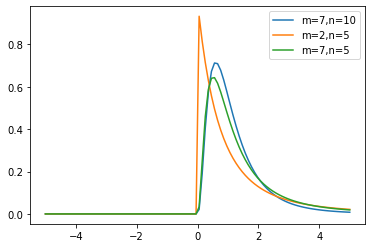

In [3]:
#2. gęstość rozkładu

x_value = np.linspace(-5, 5, 100)

plt.plot(x_value, f710.pdf(x_value))
plt.plot(x_value, f25.pdf(x_value))
plt.plot(x_value, f75.pdf(x_value))

plt.legend(['m=7,n=10', 'm=2,n=5', 'm=7,n=5'])

#stopnie swobody wpływają na przesuwanie się garbu i jego wysokość
#nośnik od 0 do nieskończoności

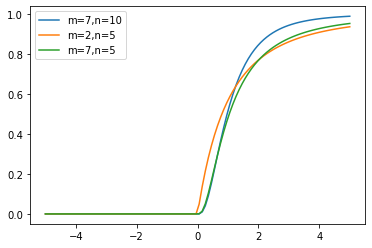

In [4]:
#3. dystrybuanty

x_value = np.linspace(-5, 5, 100)

plt.plot(x_value, f710.cdf(x_value))
plt.plot(x_value, f25.cdf(x_value))
plt.plot(x_value, f75.cdf(x_value))

plt.legend(['m=7,n=10', 'm=2,n=5', 'm=7,n=5'])

In [5]:
#4. #średnia to n/(n-2)

size = 1000000

#przybliżenie z próbki
print(np.mean(f710.rvs(size)))

#wartość teoretyczna
print(10/(10-2))

#przybliżenie z próbki
print(np.mean(f25.rvs(size)))

#wartość teoretyczna
print(5/(5-2))

#przybliżenie z próbki
print(np.mean(f75.rvs(size)))

#wartość teoretyczna
print(5/(5-2))

1.2511771357701875
1.25
1.6681327291570913
1.6666666666666667
1.6663874683968722
1.6666666666666667


In [6]:
#4. #wariancja to 2*n**2(m+n-2)/(m(n-2)**2(n-4)) dla n>4

size = 1000000

#przybliżenie z próbki
print(np.var(f710.rvs(size)))

#wartość teoretyczna
print(2*10**2*(7+10-2)/(7*(10-2)**2*(10-4)))

#przybliżenie z próbki
print(np.var(f25.rvs(size)))

#wartość teoretyczna
print(2*5**2*(2+5-2)/(2*(5-2)**2*(5-4)))

#przybliżenie z próbki
print(np.var(f75.rvs(size)))

#wartość teoretyczna
print(2*5**2*(7+5-2)/(7*(5-2)**2*(5-4)))

1.107538007488066
1.1160714285714286
12.203056016804348
13.88888888888889
8.373157495589652
7.936507936507937


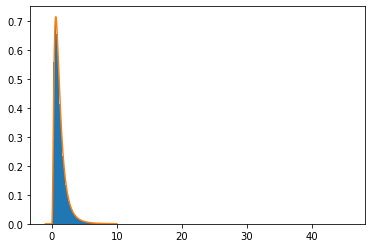

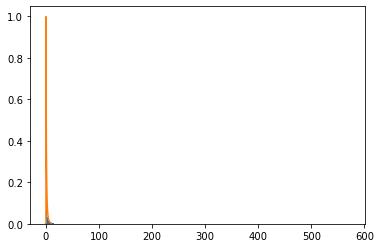

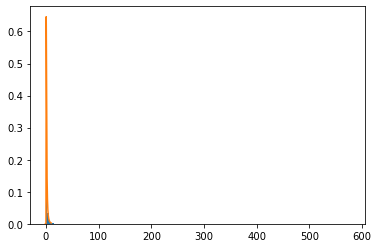

In [7]:
#5. losowanie obserwacji i 6. histogram

rs710 = f710.rvs(size)
plt.hist(rs710,bins =200, density=True)
x_value = np.linspace(-1, 10, 1000)
plt.plot(x_value, f710.pdf(x_value))
plt.show()

rs25 = f25.rvs(size)
plt.hist(rs25,bins =200, density=True)
x_value = np.linspace(-1, 10, 1000)
plt.plot(x_value, f25.pdf(x_value))
plt.show()

rs75 = f75.rvs(size)
plt.hist(rs75,bins =200, density=True)
x_value = np.linspace(-1, 10, 1000)
plt.plot(x_value, f75.pdf(x_value))
plt.show()

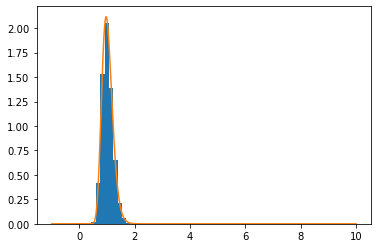

In [8]:
# 7. sprawdzamy symulacyjnie

N = 10000

m = 100
X = stats.chi2.rvs(size=N, df=m)

n = 120
Y = stats.chi2.rvs(size=N, df=n)

x_value = np.linspace(-1, 10, 1000)
Z = X * n / Y / m

plt.hist(Z, density=True)
plt.plot(x_value, stats.f.pdf(x_value, m, n))

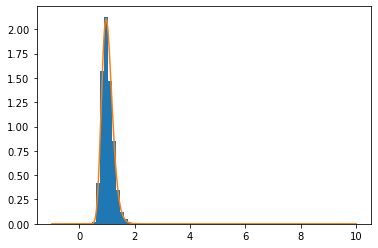

In [9]:
# 8. udowadniamy symulacyjnie

N = 1000
n1 = 100
n2 = 120
sigma = 1
mu1 = -2
mu2 = 3
Z = np.zeros(N)

for i in range(N):
    
    X = stats.norm.rvs(size=n1, loc=mu1, scale=sigma)
    Y = stats.norm.rvs(size=n2, loc=mu2, scale=sigma)
    Z[i] = X.var(ddof=1) / Y.var(ddof=1)

plt.hist(Z, density=True)
plt.plot(x_value, stats.f.pdf(x_value, n1-1, n2-1))

# Zadanie 1
Wykonano po cztery niezależne pomiary wytrzymałości na ́sciskanie trzech rodzajów betonu. Otrzymano następujące wyniki (w kG/cm2):

|    |  | | |  |
|:---:|:---:|:---:|:---:|:---:|
|  I  | 204 | 200 | 198 | 204 |
|  II | 197 | 205 | 213 | 209 |
| III | 190 | 208 | 202 | 210 |

Stwierdź, czy badane gatunki betonu różnią się istotnie pod względem ́sredniej wytrzymałości na ́sciskanie. Przyjmij poziom istotności 0.05.

Zanim przystapimy do testu $F$ powinnismy sprawdzic, czy sa spełnione założenia pozwalajace posłuzyc sie wspomnianą metodą:

1.  niezależność obserwacji,
2.  normalność  rozkładów  w  każdej  z  podpopulacji  wyznaczonych  przez  poziomy czynników,
3.  jednorodność wariancji podpopulacji wyznaczonych przez poziomy czynników.

In [10]:
group1 = np.array([204, 200, 198, 204])
group2 = np.array([197, 205, 213, 209])
group3 = np.array([190, 208, 202, 210])

## Jednorodność wariancji

Testujemy hipotezę zerową
$$
    H_0: \sigma_1^2 = \sigma^2_2 = \ldots = \sigma_r^2
$$

Do weryfikacji tej hipotezy możemy użyć testów:

1. [Bartlett's Test](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.bartlett.html)
2. [Levene Test for Equality of Variances](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.levene.html)


In [11]:
stats.bartlett(group1, group2, group3)

BartlettResult(statistic=2.670632399098727, pvalue=0.2630749781137125)

In [12]:
stats.levene(group1, group2, group3, center = 'mean')

LeveneResult(statistic=1.2672413793103448, pvalue=0.327415875663833)

### Zadanie 
Napisz funkcję, która dla $n$ wektorów wykona i wypisze wyniki testu Bartletta i Levene.

In [15]:
def variance_test(*args):
    
    d = {}
    bartlett_test = stats.bartlett(*args)
    d['bartlett_test'] = {'statistic': bartlett_test.statistic, 'pvalue': bartlett_test.pvalue}
    
    levene_test = stats.levene(*args, center='mean')
    d['levene_test'] = {'statistic': levene_test.statistic, 'pvalue': levene_test.pvalue}
    
    return pd.DataFrame(d)

In [16]:
variance_test(group1, group2, group3)

,bartlett_test,levene_test
statistic,2.670632,1.267241
pvalue,0.263075,0.327416


In [17]:
# podobnie zrobimy dla testów normalności (patrz: zadania domowe ze Zjazdu 6)

def normal_tests(x):
    
    tests = ['Shapiro-Wilk Test', "Jarque–Bera Test", 
             "Kolmogorov–Smirnov Test"]
    
    shapiro = stats.shapiro(x)
    jarque_bera = stats.jarque_bera(x)
    
    x_stand = (x - np.mean(x)) / np.std(x, ddof=1)
    ks = stats.kstest(x_stand, 'norm')
    
    statistics = np.round([shapiro[0], jarque_bera[0], ks.statistic], 2)
    pvalues = np.round([shapiro[1], jarque_bera[1], ks.pvalue], 5)
    
    return pd.DataFrame({
        'test': tests,
        'statistic': statistics,
        'pvalue': pvalues
    })

## Normalność rozkładów
Testujemy hipotezę zerową
$$
    H_0: X_i\sim N(\mu_i,\sigma_i)
$$
Dla każdej grupy $i$.
Do weryfikacji tej hipotezy możemy użyć testów:

1. [Shapiro-Wilk Test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html)
2. [Jarque-Bera Test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.jarque_bera.html)
3. [Kolmogorov-Smirnov Test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html)

In [18]:
print(normal_tests(group1))
print(normal_tests(group2))
print(normal_tests(group3))

                      test  statistic   pvalue
0        Shapiro-Wilk Test       0.85  0.22423
1         Jarque–Bera Test       0.52  0.76965
2  Kolmogorov–Smirnov Test       0.30  0.77797
                      test  statistic   pvalue
0        Shapiro-Wilk Test       0.97  0.84997
1         Jarque–Bera Test       0.35  0.84029
2  Kolmogorov–Smirnov Test       0.19  0.99235
                      test  statistic   pvalue
0        Shapiro-Wilk Test       0.89  0.40429
1         Jarque–Bera Test       0.54  0.76451
2  Kolmogorov–Smirnov Test       0.23  0.95432


# ANOVA

Testujemy hipotezę zerową
$$
H_0: \mu_1 = \mu_2 = \mu_3
$$ 
mówiącą, iż - ́srednio rzecz biorąc – badane gatunki betonu nie różnią się istotnie pod względem wytrzymałości na ́ściskanie, wobec hipotezy alternatywnej orzekającej, iż te gatunki różnią się wytrzymałością.

Oznaczmy (w naszym zadaniu $r=3,n=4$)





*   Średnią ze wszystkich obserwacji
    \begin{equation*}
        \overline{\overline{Y}} = \frac{1}{nr}\sum_{i=1}^r\sum_{j=1}^n Y_{ij},
    \end{equation*}
*   Średnią na $i$-tym poziomie, $1 \leq i \leq n$
    \begin{equation*}
        \overline{Y}_i = \frac{1}{n}\sum_{j=1}^n Y_{ij},
    \end{equation*}
*    Zmienność całkowitą w eksperymencie
    \begin{equation*}
        \text{SST} = \sum_{i=1}^r\sum_{j=1}^n (Y_{ij} -  \overline{\overline{Y}})^2,
    \end{equation*}
*   zmienność między poziomami
    \begin{equation*}
        \text{SSA} = n\sum_{i=1}^r(\overline{Y}_i - \overline{\overline{Y}})^2,
\end{equation*}
*  zmienność na danym poziomie
    \begin{equation*}
        \text{SSE} = \sum_{i=1}^r\sum_{j=1}(Y_{ij} - \overline{Y}_i)^2.
    \end{equation*}

    TW.  $\text{SST}=\text{SSA}+\text{SSE}$


Statystyka testowa jest postaci:
    \begin{equation*}
        F = \frac{\frac{\text{SSA}}{r-1}}{\frac{SSE}{r(n-1)}}=\frac{MSA}{MSE}.
    \end{equation*}

Obszar krytyczny testu $F$ jest postaci
\begin{equation*}
    [F^{(r-1)(r(n-1))}_{1-\alpha}, +\infty).
\end{equation*}

In [19]:
stats.f_oneway(group1, group2, group3)  # średnia na ściskanie dla wszystkich grup jest porównywalna

F_onewayResult(statistic=0.4902439024390243, pvalue=0.6279258107968897)

In [20]:
#inny sposób

values = np.concatenate([group1, group2, group3])
n = len(group1)

types = np.concatenate([['I'] * n, ['II'] * n, ['III'] * n])

In [21]:
df = pd.DataFrame({'type': types,'value': values})
df.head()

,type,value
0,I,204
1,I,200
2,I,198
3,I,204
4,II,197


In [22]:
# działa również dla ANOVA wieloczynnikowej (poprzedni sposób działa tylko dla ANOVA jednoskładnikowej)

model = ols('value~C(type)', df).fit()  # 'ordinary least squares'
anv = anova_lm(model)
anv

,df,sum_sq,mean_sq,F,PR(>F)
C(type),2.0,44.666667,22.333333,0.490244,0.627926
Residual,9.0,410.000000,45.555556,NaN,NaN


# *Zadanie 1b
Zaimplementuj swoją wersję testu $F$.

In [25]:
def anova_oneway(df):
    
    levels = np.unique(df.type)
    groups = []
    mean_all = np.mean(df.value)
    SST = np.sum((df.value-mean_all)**2)
    SSA = 0
    
    for i in np.unique(df.type):
      
        group = df.value[df.type==i]
        mean_group = np.mean(group)
        SSA_part = (mean_group-mean_all)**2
        SSA = SSA+SSA_part
    
    r = len(np.unique(df.type))
    n = df.shape[0]/r  # dla równolicznych grup
    
    SSA = n*SSA
    SSE = SST-SSA

    Fstat = (SSA/(r-1))/(SSE/(r*(n-1)))
    frand = stats.f(dfn = r-1,dfd = r*(n-1))
    pval = 1-frand.cdf(Fstat)
    
    return(np.array([SSA,SSE,Fstat,pval]))  

In [26]:
anova_oneway(df)

array([ 44.66666667, 410.        ,   0.4902439 ,   0.62792581])

# Zadanie 2
Wapń jest niezbędnym minerałem, który reguluje pracę serca, jest ważny dla krzepnięcia krwi i budowy zdrowych kości. Narodowa Fundacja Osteoporozy zaleca dzienne spożycie wapnia w ilości 1000-1200 mg / dzień dla dorosłych mężczyzn i kobiet. Podczas gdy wapń jest zawarty w niektórych produktach spożywczych, większość dorosłych nie ma wystarczającej ilości wapnia w swojej diecie i przyjmuje suplementy. Niestety niektóre suplementy mają skutki uboczne, takie jak zaburzenia żołądkowe, co utrudnia ich regularne przyjmowanie przez niektórych pacjentów.

Badanie ma na celu sprawdzenie, czy istnieje różnica w średnim dziennym spożyciu wapnia u osób dorosłych z prawidłową gęstością kości, osób dorosłych z osteopenią (mała gęstość kości, która może prowadzić do osteoporozy) i osób dorosłych z osteoporozą. Dorośli w wieku 60 lat z prawidłową gęstością kości, osteopenią i osteoporozą są losowo wybierani z rejestrów szpitalnych i zapraszani do udziału w badaniu. Dzienne spożycie wapnia przez każdego uczestnika jest mierzone na podstawie zgłoszonego spożycia żywności i suplementów. Dane są pokazane poniżej.

| Prawidłowa gęstość kości | Osteopenia | Osteoporoza |
|:------------------------:|:----------:|:-----------:|
|           1200           |    1000    |     890     |
|           1000           |    1100    |     650     |
|            980           |     700    |     1100    |
|            900           |     800    |     900     |
|            750           |     500    |     400     |
|            800           |     700    |     350     |

Czy istnieje statystycznie istotna różnica w średnim spożyciu wapnia u pacjentów z prawidłową gęstością kości w porównaniu do pacjentów z osteopenią i osteoporozą? Przyjmij poziom istotności 0.05.

In [28]:
group1 = [1200, 1000, 980, 900, 750, 800]
group2 = [1000, 1100, 700, 800, 500, 700]
group3 = [890, 650, 1100, 900, 400, 350]

In [29]:
variance_test(group1, group2, group3)  # założenie ANOVA spełnione

,bartlett_test,levene_test
statistic,1.717165,1.909520
pvalue,0.423762,0.182475


In [30]:
print(normal_tests(group1))
print(normal_tests(group2))
print(normal_tests(group3))  # założenia ANOVA spełnione

                      test  statistic   pvalue
0        Shapiro-Wilk Test       0.96  0.78384
1         Jarque–Bera Test       0.36  0.83718
2  Kolmogorov–Smirnov Test       0.18  0.96226
                      test  statistic   pvalue
0        Shapiro-Wilk Test       0.96  0.78283
1         Jarque–Bera Test       0.33  0.84703
2  Kolmogorov–Smirnov Test       0.18  0.97441
                      test  statistic   pvalue
0        Shapiro-Wilk Test       0.92  0.51605
1         Jarque–Bera Test       0.55  0.76096
2  Kolmogorov–Smirnov Test       0.22  0.87770


In [31]:
stats.f_oneway(group1, group2, group3)  # nie istnieje statystycznie istotna różnica w spożyciu wapnia przez różne grupy

F_onewayResult(statistic=1.3948973368570847, pvalue=0.2782290200522075)

# Zadanie 3
Wysunięto przypuszczenie, że wytrzymałość toreb papierowych zależy od stężenia twardego drewna w ścierze drzewnym, z którego owe torby są wytwarzane. W praktyce stosuje się stężenia od 5% do 20%. Dotychczasowe badania wykazały, że rozkład wytrzymałości toreb jest normalny, przy czym obserwowana zmienność nie zależała od poziomu stężenia twardego drewna w ścierze drzewnym. Poniższa tabela zawiera wyniki pomiarów wytrzymałości na rozciąganie (w psi) otrzymane podczas badań laboratoryjnych 24 toreb papierowych. Zbadać, czy wytrzymałość toreb zależy faktycznie od poziomu stężenia twardego drewna w ścierze drzewnym.

|  Stężenie ścieru drzewnego |    |    |    |    |    |    |
|:--------------------------:|:--:|:--:|:--:|:--:|:--:|:--:|
|             5%             |  7 |  8 | 15 | 11 |  9 | 10 |
|             10%            | 12 | 17 | 13 | 18 | 19 | 15 |
|             15%            | 14 | 18 | 19 | 17 | 16 | 18 |
|             20%            | 19 | 25 | 22 | 23 | 18 | 20 |

In [32]:
group1 = [7, 8, 15, 11, 9, 10]
group2 = [12, 17, 13, 18, 19, 15]
group3 = [14, 18, 19, 17, 16, 18]
group4 = [19, 25, 22, 23, 18, 20]

In [33]:
variance_test(group1, group2, group3, group4)

,bartlett_test,levene_test
statistic,1.135246,0.665064
pvalue,0.768573,0.583262


In [34]:
print(normal_tests(group1))
print(normal_tests(group2))
print(normal_tests(group3))
print(normal_tests(group4))

                      test  statistic   pvalue
0        Shapiro-Wilk Test       0.92  0.52270
1         Jarque–Bera Test       0.78  0.67716
2  Kolmogorov–Smirnov Test       0.20  0.94266
                      test  statistic   pvalue
0        Shapiro-Wilk Test       0.94  0.65994
1         Jarque–Bera Test       0.59  0.74593
2  Kolmogorov–Smirnov Test       0.18  0.96493
                      test  statistic   pvalue
0        Shapiro-Wilk Test       0.93  0.60671
1         Jarque–Bera Test       0.58  0.74741
2  Kolmogorov–Smirnov Test       0.21  0.90216
                      test  statistic   pvalue
0        Shapiro-Wilk Test       0.97  0.86308
1         Jarque–Bera Test       0.45  0.79839
2  Kolmogorov–Smirnov Test       0.17  0.98048


In [36]:
stats.f_oneway(group1, group2, group3, group4)  # odrzucamy hipotezę zerową H0 --> co najmniej jedna z grup jest różna!

F_onewayResult(statistic=19.605206999573184, pvalue=3.5925782584743027e-06)

## post-hoc - porówania wielokrotne
Testujemy
\begin{equation*}
    \begin{split}
        H_{0, ik}&: \mu_i = \mu_k, \\
        H_{1, ik}&: \mu_i \neq \mu_k
    \end{split}
\end{equation*}
dla wszystkich par $i, k=1, \ldots, r, i < k$.

Hipotezę zerową odrzucamy, gdy $|\overline{Y}_i - \overline{Y}_k|$ jest ,,za duża''.

### Metoda Tukeya
Odrzucamy hipotezę zerową $H_{0, ik}$, gdy
\begin{equation*}
    |\overline{Y}_i - \overline{Y}_k| \geq q_{1-\alpha}^{(r, r(n-1))}\sqrt{\frac{\text{MSE}}{n}},
\end{equation*}
gdzie $q_{1-\alpha}^{(r, r(n-1)}$ jest kwantylem studentyzowanego rozkładu rozstępu.

In [37]:
values = np.concatenate([group1, group2, group3, group4])
n = len(group1)
types = np.concatenate([['5%'] * n, ['10%'] * n, ['15%'] * n, ['20%'] * n])

df = pd.DataFrame({'type': types,'value': values})
df.head()

,type,value
0,5%,7
1,5%,8
2,5%,15
3,5%,11
4,5%,9


In [38]:
multicomparison = MultiComparison(data = df.value, groups = df.type)
multicomparison

In [39]:
tukey = multicomparison.tukeyhsd()
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
10%,15%,1.3333,0.8022,-2.7892,5.4559,False
10%,20%,5.5,0.0066,1.3774,9.6226,True
10%,5%,-5.6667,0.0051,-9.7892,-1.5441,True
15%,20%,4.1667,0.047,0.0441,8.2892,True
15%,5%,-7.0,0.0007,-11.1226,-2.8774,True
20%,5%,-11.1667,0.0,-15.2892,-7.0441,True


In [40]:
# alternatywnie - bez wywoływania MultiComparison()
tukey2 = pairwise_tukeyhsd(endog = df.value, groups = df.type)
tukey2.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
10%,15%,1.3333,0.8022,-2.7892,5.4559,False
10%,20%,5.5,0.0066,1.3774,9.6226,True
10%,5%,-5.6667,0.0051,-9.7892,-1.5441,True
15%,20%,4.1667,0.047,0.0441,8.2892,True
15%,5%,-7.0,0.0007,-11.1226,-2.8774,True
20%,5%,-11.1667,0.0,-15.2892,-7.0441,True


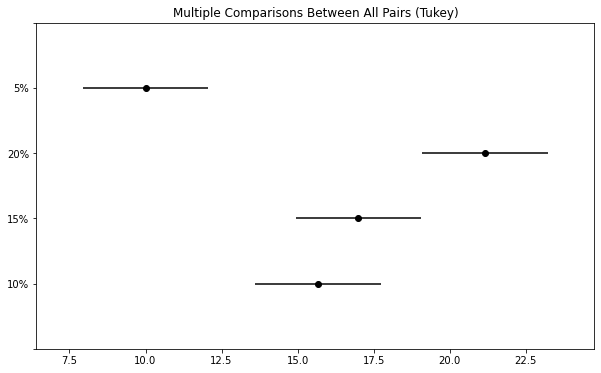

In [41]:
tukey2.plot_simultaneous()
plt.show()

# Zadanie 4
W pliku `zarobki.csv` zamieszczono historyczne dane dotyczące wysokosci miesięcznych zarobków wybranych losowo osób w czterech miastach: Warszawie, Krakowie, Wrocławiu i Katowicach. Zbadaj, czy wysokość miesięcznych zarobków w tych miastach różni się istotnie (przyjmij poziom istotności 0.05).

In [42]:
zarobki = pd.read_csv('../../data/zarobki.csv', sep = ";")
zarobki.head()

,zarobki,miasto
0,1600,Warszawa
1,1900,Warszawa
2,2600,Warszawa
3,1180,Krakow
4,1412,Krakow


In [43]:
zarobki_warszawa = zarobki.zarobki[zarobki.miasto=='Warszawa']
zarobki_krakow = zarobki.zarobki[zarobki.miasto=='Krakow']
zarobki_wroclaw = zarobki.zarobki[zarobki.miasto=='Wroclaw']
zarobki_katowice = zarobki.zarobki[zarobki.miasto=='Katowice']

In [44]:
variance_test(zarobki_warszawa, zarobki_krakow, zarobki_wroclaw, zarobki_katowice) # wariancje nie są równe!!

,bartlett_test,levene_test
statistic,15.981910,4.585029
pvalue,0.001144,0.007504


In [45]:
print(normal_tests(zarobki_warszawa))
print(normal_tests(zarobki_krakow))
print(normal_tests(zarobki_wroclaw))
print(normal_tests(zarobki_katowice))

# nie są spełnione założenia o normalności rozkładów!!

                      test  statistic   pvalue
0        Shapiro-Wilk Test       0.86  0.04345
1         Jarque–Bera Test       3.79  0.15019
2  Kolmogorov–Smirnov Test       0.25  0.35210
                      test  statistic   pvalue
0        Shapiro-Wilk Test       0.87  0.09816
1         Jarque–Bera Test       1.97  0.37390
2  Kolmogorov–Smirnov Test       0.18  0.84697
                      test  statistic   pvalue
0        Shapiro-Wilk Test       0.84  0.03953
1         Jarque–Bera Test       3.62  0.16358
2  Kolmogorov–Smirnov Test       0.22  0.64974
                      test  statistic   pvalue
0        Shapiro-Wilk Test       0.74  0.00145
1         Jarque–Bera Test      11.91  0.00259
2  Kolmogorov–Smirnov Test       0.25  0.40442


In [48]:
stats.kruskal(zarobki_warszawa, zarobki_krakow, zarobki_wroclaw, zarobki_katowice)  # sytuacja "na granicy", odrzucamy H0 ?
# stats.kruskal(zarobki_krakow, zarobki_wroclaw, zarobki_katowice)

KruskalResult(statistic=8.052855983308689, pvalue=0.044931869248118164)

In [51]:
# alternatywa dla testów Tukeya --> testy Dunna (tym razem nie odrzucamy hipotezy H0 - znowu wynik 'na granicy')

import scikit_posthocs as sp

data = [zarobki_warszawa, zarobki_krakow, zarobki_wroclaw, zarobki_katowice]
sp.posthoc_dunn(data, p_adjust = 'holm')  # można użyć innych argumentów dla parametru 'p_adjust'

,1,2,3,4
1,1.000000,0.296922,0.182787,0.054103
2,0.296922,1.000000,1.000000,1.000000
3,0.182787,1.000000,1.000000,1.000000
4,0.054103,1.000000,1.000000,1.000000


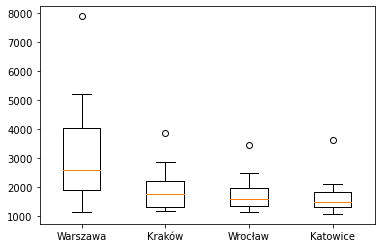

In [53]:
# Warszawa ma inny rozkład zarobków

plt.boxplot(data, labels=['Warszawa', 'Kraków', 'Wrocław', 'Katowice'])
plt.show()

# Zadanie 5
W celu porównania trzech ́srodków antykorozyjnych pobrano po 10 próbek losowych drutu zabezpieczanego każdym z tych ́srodków i zmierzono głębokość zaistniałej korozji (razy 10−3mm). Wyniki pomiarów przestawia poniższa tabelka:

| Środek A | Środek B | Środek C |
|:--------:|:--------:|:--------:|
|   98.5   |   100.2  |   56.7   |
|   98.5   |   99.2   |   82.0   |
|   98.5   |   99.9   |   67.8   |
|   97.5   |   97.8   |   58.3   |
|   99.3   |   99.8   |   61.2   |
|   102.0  |   100.5  |   67.8   |
|   101.8  |   99.8   |   117.4  |
|   98.3   |   99.0   |   103.4  |
|   102.0  |   101.1  |   43.8   |
|   101.2  |   100.8  |   86.1   |

Czy na podstawie tych  danym można stwierdzić, ̇ze ́srodki te różnią się istotnie podwzględem jakości tworzonego przez nie zabezpieczenia antykorozyjnego?

In [80]:
group1 = [98.5, 98.5, 98.5, 97.5, 99.3, 102, 101.8, 98.3, 102, 101.2]
group2 = [100.2, 99.2, 99.9, 97.8, 99.8, 100.5, 99.8, 99, 101.1, 100.8]
group3 = [56.7, 82, 67.8, 58.3, 61.2, 67.8, 117.4, 103.4, 43.8, 86.1]

In [81]:
variance_test(group1, group2, group3)

,bartlett_test,levene_test
statistic,6.987810e+01,19.604626
pvalue,6.701383e-16,0.000006


In [82]:
print(normal_tests(group1))
print(normal_tests(group2))
print(normal_tests(group3))

                      test  statistic   pvalue
0        Shapiro-Wilk Test       0.83  0.03595
1         Jarque–Bera Test       1.25  0.53564
2  Kolmogorov–Smirnov Test       0.26  0.43224
                      test  statistic   pvalue
0        Shapiro-Wilk Test       0.95  0.67555
1         Jarque–Bera Test       0.83  0.66136
2  Kolmogorov–Smirnov Test       0.20  0.76993
                      test  statistic   pvalue
0        Shapiro-Wilk Test       0.94  0.53834
1         Jarque–Bera Test       0.82  0.66230
2  Kolmogorov–Smirnov Test       0.22  0.66945


In [83]:
stats.kruskal(group1, group2, group3)

KruskalResult(statistic=7.00187165775402, pvalue=0.030169137057844988)

In [84]:
data = [group1, group2, group3]
sp.posthoc_dunn(data, p_adjust = 'holm')

,1,2,3
1,1.000000,0.878778,0.05423
2,0.878778,1.000000,0.05423
3,0.054230,0.054230,1.00000


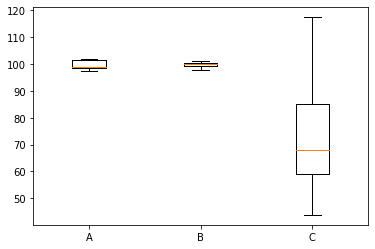

In [85]:
plt.boxplot(data, labels=['A', 'B', 'C'])
plt.show()

## Dwuczynnikowa ANOVA
Model:
\begin{equation*}
        Y_{ijk} = \mu + \alpha_i + \beta_j + \gamma_{ij} + \varepsilon_{ijk},
\end{equation*}
Testujemy hipotezy
\begin{equation*}
    \begin{split}
        H_{0,1}&: \alpha_1 = \alpha_2 = \ldots = \alpha_r=0 \\
        H_{1, 1}&: \neg H_{0, 1}, \\
                & \\
        H_{0,2}&: \beta_1 = \beta_2 = \ldots = \beta_s=0 \\
        H_{1,2}&: \neg H_{0,2},\\
                & \\
        H_{0,3}&: \gamma_{11} =  \ldots = \gamma_{rs}=0 \\
        H_{1,3}&: \neg H_{0,3}
    \end{split}
\end{equation*}

| Źródło zmienności | Suma kwadratów ochyleń | Stopnie swobody| Średni kwadrat ochyleń | Statystyki testowe |
|:--------:|:--------:|:--------:|:--------:|:--------:|
| Czynnik A | $SSA$| r − 1| MSA = $\frac{SSA}{r−1}$ | F1 = $\frac{MSA}{MSE}$ |
| Czynnik B | $SSB$| r − 1| MSB = $\frac{SSB}{s−1}$ | F1 = $\frac{MSB}{MSE}$ |
| Interakcje SSAB | $SSAB$| (r − 1)(s − 1)| MSAB = $\frac{SSAB}{(r−1)(s−1)}$ | F1 = $\frac{MSAB}{MSE}$ |
| Błąd losowy | $SSE$| rs(n − 1)| MSE = $\frac{SSE}{rs(n − 1)}$ |  |
| Ogółem | $SST$| rsn − 1|  |  |

# Zadanie 6
Przeprowadzono następujące doświadczenie: 18 mężczyzn i 18 kobiet rozmieszczono losowo w 9 pokojach w ten sposób, ̇ze w każdym pokoju były po dwie osoby tej samej płci. W pokojach tych utrzymywano stałą temperaturę: 18, 21 albo 24 stopnie Celsjusza (przydział temperatur poszczególnym pokojom był także losowy). Po upływie trzech godzin oceniano samopoczucie każdej z badanych osób (zastosowano ocenę punktową, w której 1 = zbyt zimno, 8 = idealna temperatura, 15 = zbyt ciepło).

|    |         M         |          K         |
|:--:|:-----------------:|:------------------:|
| 18 |  5, 4, 5, 4, 4, 2 |  1, 2, 5, 5, 1, 3  |
| 21 |  8, 8, 6, 3, 5, 7 |  10, 7, 8, 8, 7, 8 |
| 24 | 12, 8, 8, 7, 6, 6 | 11, 13, 8, 8, 6, 7 |

Zbadaj wpływ, jaki na samopoczucie osób wywiera temperatura panująca w danym pokoju. Czy ocena samopoczucia zależy od płci? Czy występują ̨tu istotne interakcje między badanymi czynnikami (tzn. temperaturą i płcią)?

In [55]:
grupa1 = np.array([5, 4, 5, 4, 4, 2])
grupa2 = np.array([8, 8, 6, 3, 5, 7])
grupa3 = np.array([12, 8, 8, 7, 6, 6])
grupa4 = np.array([1, 2, 5, 5, 1, 3])
grupa5 = np.array([10, 7, 8, 8, 7, 8])
grupa6 = np.array([11, 13, 8, 8, 6, 7])

In [56]:
print(variance_test(grupa1, grupa2, grupa3, grupa4, grupa5, grupa6))

print(normal_tests(grupa1))
print(normal_tests(grupa2))
print(normal_tests(grupa3))
print(normal_tests(grupa4))
print(normal_tests(grupa5))
print(normal_tests(grupa6))

           bartlett_test  levene_test
statistic       5.566123     1.632925
pvalue          0.350750     0.181675
                      test  statistic   pvalue
0        Shapiro-Wilk Test       0.81  0.07784
1         Jarque–Bera Test       1.00  0.60653
2  Kolmogorov–Smirnov Test       0.33  0.42344
                      test  statistic   pvalue
0        Shapiro-Wilk Test       0.91  0.45221
1         Jarque–Bera Test       0.57  0.75283
2  Kolmogorov–Smirnov Test       0.17  0.97865
                      test  statistic   pvalue
0        Shapiro-Wilk Test       0.82  0.08507
1         Jarque–Bera Test       1.39  0.49893
2  Kolmogorov–Smirnov Test       0.30  0.54006
                      test  statistic   pvalue
0        Shapiro-Wilk Test       0.85  0.15787
1         Jarque–Bera Test       0.69  0.70741
2  Kolmogorov–Smirnov Test       0.21  0.89486
                      test  statistic   pvalue
0        Shapiro-Wilk Test       0.81  0.07784
1         Jarque–Bera Test       1.00  0

In [61]:
values = np.concatenate([grupa1, grupa2, grupa3, grupa4, grupa5, grupa6])
n = len(grupa1)

group1 = np.concatenate([['M'] * (3 * n), ['K'] * (3 * n)])
group2 = np.concatenate([['18'] * n, ['21'] * n, ['24'] * n, ['18'] * n, ['21'] * n, ['24'] * n])

df = pd.DataFrame({'value': values, 'group1': group1, 'group2': group2})
df.head()

,value,group1,group2
0,5,M,18
1,4,M,18
2,5,M,18
3,4,M,18
4,4,M,18


In [64]:
formula = 'value ~ C(group1) + C(group2) + C(group1):C(group2)'
model = ols(formula, df).fit()

anv = anova_lm(model)
print(anv)

                       df      sum_sq    mean_sq          F    PR(>F)
C(group1)             1.0    2.777778   2.777778   0.776398  0.385250
C(group2)             2.0  156.722222  78.361111  21.902174  0.000001
C(group1):C(group2)   2.0   14.388889   7.194444   2.010870  0.151520
Residual             30.0  107.333333   3.577778        NaN       NaN


In [66]:
# wpływ ma jedynie grupa 2 (temperatura)

tukey2 = pairwise_tukeyhsd(endog = df.value, groups = df.group2)
tukey2.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
18,21,3.6667,0.0002,1.7209,5.6124,True
18,24,4.9167,0.0,2.9709,6.8624,True
21,24,1.25,0.2699,-0.6958,3.1958,False


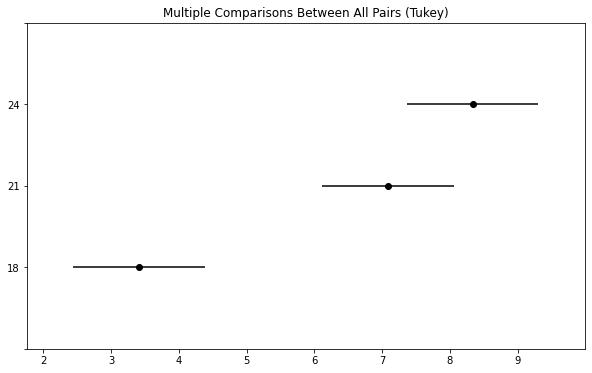

In [67]:
# temperatura 18 stopni znacząco odstaje od pozostałych temperatur

tukey2.plot_simultaneous()
plt.show()

# Zadanie 7
W  pewnych  zakładach  lotniczych  stosuje  się  dwie  metody  nakładania farby podkładowej na częsci aluminiowe: malowanie zanurzeniowe i natryskowe. Czyni się  tak  w  celu  zwiększenia  przylegania  właściwej  farby  nawierzchniowej,  którą  później są malowane owe części. We wspomnianych zakładach stosowano do tej pory trzy rodzaje farb podkładowych. Inżynier technolog, odpowiedzialny za ten etap produkcji, postanowił zbadać, czy rodzaj farby podkładowej oraz sposób jej nakładania na detal mają istotny wpływ na siłę przylegania właściwej farby nawierzchniowej. W tym celu przeprowadzono eksperyment, w którym zmierzono siłę przylegania farby nawierzchniowej do kilku detali malowanych najpierw różnymi farbami podkładowymi, nanoszonymi obiema metodami. Wyniki pomiarów zamieszczono w poniższej tabeli.

| Rodzaj farby |  Malowanie zanurzeniowe |  Malowanie natryskowe |
|:------------:|:-----------------------:|:---------------------:|
|       A      |      4.0, 4.5, 4.3      |     5.4, 4.9, 5.6     |
|       B      |      5.6, 4.9, 5.4      |     5.8, 6.1, 6.3     |
|       C      |      3.8, 3.7, 3.9      |     6.5, 6.0, 5.0     |

Jakie wnioski powinien wyciągnąć inżynier na podstawie powyższych wyników?

In [86]:
grupa1 = np.array([4.0, 4.5, 4.3])
grupa2 = np.array([5.6, 4.9, 5.4])
grupa3 = np.array([3.8, 3.7, 3.9])
grupa4 = np.array([5.4, 4.9, 5.6])
grupa5 = np.array([5.8, 6.1, 6.3])
grupa6 = np.array([6.5, 6.0, 5.0])

In [87]:
print(variance_test(grupa1, grupa2, grupa3, grupa4, grupa5, grupa6))

print(normal_tests(grupa1))
print(normal_tests(grupa2))
print(normal_tests(grupa3))
print(normal_tests(grupa4))
print(normal_tests(grupa5))
print(normal_tests(grupa6))

           bartlett_test  levene_test
statistic       6.482549     2.455678
pvalue          0.262053     0.093931
                      test  statistic   pvalue
0        Shapiro-Wilk Test       0.99  0.78044
1         Jarque–Bera Test       0.31  0.85649
2  Kolmogorov–Smirnov Test       0.22  0.99298
                      test  statistic   pvalue
0        Shapiro-Wilk Test       0.94  0.53674
1         Jarque–Bera Test       0.39  0.82207
2  Kolmogorov–Smirnov Test       0.28  0.93742
                      test  statistic   pvalue
0        Shapiro-Wilk Test       1.00  1.00000
1         Jarque–Bera Test       0.28  0.86882
2  Kolmogorov–Smirnov Test       0.17  0.99998
                      test  statistic   pvalue
0        Shapiro-Wilk Test       0.94  0.53674
1         Jarque–Bera Test       0.39  0.82207
2  Kolmogorov–Smirnov Test       0.28  0.93742
                      test  statistic   pvalue
0        Shapiro-Wilk Test       0.99  0.78044
1         Jarque–Bera Test       0.31  0

In [88]:
values = np.concatenate([grupa1, grupa2, grupa3, grupa4, grupa5, grupa6])
n = len(grupa1)

group1 = np.concatenate([['Z'] * (3 * n), ['N'] * (3 * n)])
group2 = np.concatenate([['A'] * n, ['B'] * n, ['C'] * n, ['A'] * n, ['B'] * n, ['C'] * n])

df = pd.DataFrame({'value': values, 'group1': group1, 'group2': group2})
df.head()

,value,group1,group2
0,4.0,Z,A
1,4.5,Z,A
2,4.3,Z,A
3,5.6,Z,B
4,4.9,Z,B


In [89]:
formula = 'value ~ C(group1) + C(group2) + C(group1):C(group2)'
model = ols(formula, df).fit()

anv = anova_lm(model)
print(anv)

                       df    sum_sq   mean_sq          F    PR(>F)
C(group1)             1.0  7.347222  7.347222  44.982993  0.000022
C(group2)             2.0  3.124444  1.562222   9.564626  0.003282
C(group1):C(group2)   2.0  1.337778  0.668889   4.095238  0.044077
Residual             12.0  1.960000  0.163333        NaN       NaN


In [90]:
tukey2 = pairwise_tukeyhsd(endog = df.value, groups = df.group1)
tukey2.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
N,Z,-1.2778,0.0006,-1.9109,-0.6446,True


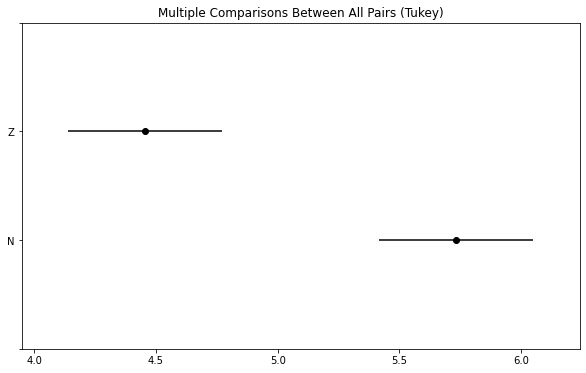

In [91]:
tukey2.plot_simultaneous()
plt.show()

In [92]:
tukey2 = pairwise_tukeyhsd(endog = df.value, groups = df.group2)
tukey2.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
A,B,0.9,0.1874,-0.3633,2.1633,False
A,C,0.0333,0.9974,-1.23,1.2967,False
B,C,-0.8667,0.2091,-2.13,0.3967,False


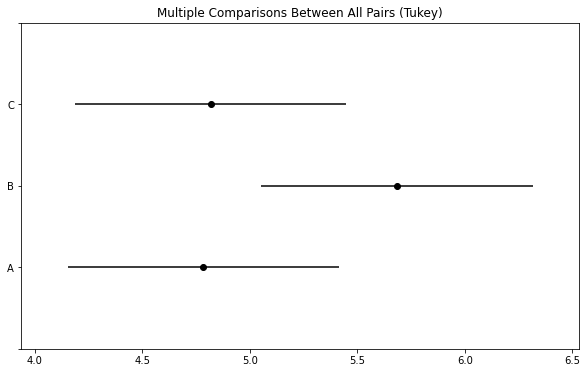

In [93]:
tukey2.plot_simultaneous()
plt.show()

# Zadanie 8
W celu zbadania wpływu czterech dawek nawożenia azotowego (w ilościach 0, 40, 80 i 120 kg/ha) na wysokość plonów lucerny przy trzech sposobach siewu (siew czysty C oraz dwa rodzaje wsiewu M i P w jęczmień jary) założono doświadczenie w czterech powtórzeniach. Dla każdej kombinacji nawożenia ze sposobem siewu zmierzono plon zielonej masy (w kg z poletka). W pierwszym pokosie uzyskano następujące obserwacje:

|   |            0            |           40           |           80           |           120          |
|:-:|:-----------------------:|:----------------------:|:----------------------:|:----------------------:|
| C | 33.2, 36.2, 44.2, 51.0  | 42.2, 41.4, 50.6, 45.2 | 50.2, 53.0, 52.6, 45.0 | 46.2, 52.4, 49.0, 43.6 |
| M |  18.6, 13.0, 14.6, 18.8 | 18.0, 20.0, 14.2, 19.1 | 24.2, 21.6, 16.4, 19.0 | 34.2, 17.2, 15.5, 22.2 |
| P |  20.4, 14.4, 11.0, 22.6 | 21.9, 42.0, 16.2, 25.6 | 18.2, 21.0, 27.3, 27.6 | 16.4, 15.0, 21.6, 27.8 |

Ustal, który z badanych czynników miał istotny wpływ na wysokość plonów masy zielonej.

In [68]:
grupa1 = [33.2, 36.2, 44.2, 51.0]
grupa2 = [18.6, 13.0, 14.6, 18.8]
grupa3 = [20.4, 14.4, 11.0, 22.6]
grupa4 = [42.2, 41.4, 50.6, 45.2]
grupa5 = [18.0, 20.0, 14.2, 19.1]
grupa6 = [21.9, 42.0, 16.2, 25.6]
grupa7 = [50.2, 53.0, 52.6, 45.0]
grupa8 = [24.2, 21.6, 16.4, 19.0]
grupa9 = [18.2, 21.0, 27.3, 27.6]
grupa10 = [46.2, 52.4, 49.0, 43.6]
grupa11 = [34.2, 17.2, 15.5, 22.2]
grupa12 = [16.4, 15.0, 21.6, 27.8]

In [ ]:
n=48

In [70]:
print(variance_test(grupa1, grupa2, grupa3, grupa4,
                    grupa5, grupa6, grupa7, grupa8,
                    grupa9, grupa10, grupa11, grupa12))

print(normal_tests(grupa1))
print(normal_tests(grupa2))
print(normal_tests(grupa3))
print(normal_tests(grupa4))
print(normal_tests(grupa5))
print(normal_tests(grupa6))
print(normal_tests(grupa7))
print(normal_tests(grupa8))
print(normal_tests(grupa9))
print(normal_tests(grupa10))
print(normal_tests(grupa11))
print(normal_tests(grupa12))

           bartlett_test  levene_test
statistic      12.723252     1.599828
pvalue          0.311798     0.140707
                      test  statistic   pvalue
0        Shapiro-Wilk Test       0.95  0.70498
1         Jarque–Bera Test       0.42  0.80912
2  Kolmogorov–Smirnov Test       0.23  0.95172
                      test  statistic   pvalue
0        Shapiro-Wilk Test       0.85  0.24226
1         Jarque–Bera Test       0.56  0.75742
2  Kolmogorov–Smirnov Test       0.29  0.79885
                      test  statistic   pvalue
0        Shapiro-Wilk Test       0.94  0.65179
1         Jarque–Bera Test       0.46  0.79323
2  Kolmogorov–Smirnov Test       0.23  0.95042
                      test  statistic   pvalue
0        Shapiro-Wilk Test       0.89  0.39743
1         Jarque–Bera Test       0.53  0.76890
2  Kolmogorov–Smirnov Test       0.24  0.93836
                      test  statistic   pvalue
0        Shapiro-Wilk Test       0.89  0.38356
1         Jarque–Bera Test       0.59  0

In [71]:
values = np.concatenate([grupa1, grupa2, grupa3, grupa4,
                         grupa5, grupa6, grupa7, grupa8,
                         grupa9, grupa10, grupa11, grupa12])
n = len(grupa1)

group1 = np.concatenate([['0'] * (3 * n), ['40'] * (3 * n), ['80'] * (3 * n), ['120'] * (3 * n)])
group2 = np.concatenate([['C'] * n, ['M'] * n, ['P'] * n,
                         ['C'] * n, ['M'] * n, ['P'] * n,
                         ['C'] * n, ['M'] * n, ['P'] * n,
                         ['C'] * n, ['M'] * n, ['P'] * n])

df = pd.DataFrame({'value': values, 'group1': group1, 'group2': group2})
df.head()

,value,group1,group2
0,33.2,0,C
1,36.2,0,C
2,44.2,0,C
3,51.0,0,C
4,18.6,0,M


In [72]:
formula = 'value ~ C(group1) + C(group2) + C(group1):C(group2)'
model = ols(formula, df).fit()

# nie ma interakcji pomiędzy grupami (odczucenie hipotezy zerowej H0)
anv = anova_lm(model)
print(anv)

                       df       sum_sq      mean_sq           F        PR(>F)
C(group1)             3.0   294.311667    98.103889    2.841761  5.136632e-02
C(group2)             2.0  6998.981667  3499.490833  101.369223  1.624959e-15
C(group1):C(group2)   6.0   169.663333    28.277222    0.819102  5.624660e-01
Residual             36.0  1242.800000    34.522222         NaN           NaN


In [76]:
# potwierdzenie, że grupa 1 (rodzaj nawozu) nie ma wpływu na jakość plonów
tukey2 = pairwise_tukeyhsd(endog = df.value, groups = df.group1)
tukey2.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
0,120,5.2583,0.7881,-9.8128,20.3295,False
0,40,4.8667,0.8242,-10.2045,19.9378,False
0,80,6.5083,0.6591,-8.5628,21.5795,False
120,40,-0.3917,0.9999,-15.4628,14.6795,False
120,80,1.25,0.9961,-13.8211,16.3211,False
40,80,1.6417,0.9913,-13.4295,16.7128,False


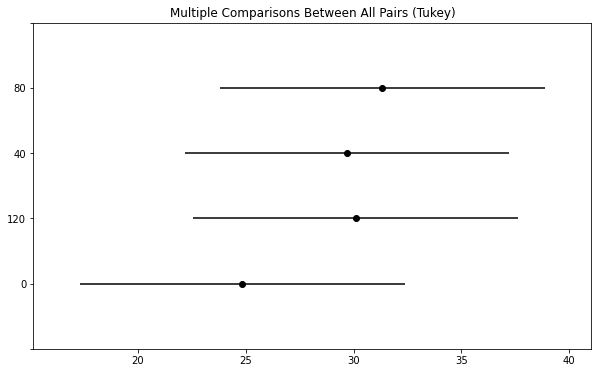

In [75]:
tukey2.plot_simultaneous()
plt.show()

In [77]:
# potwierdzenie, że grupa 2 (sposób siewu) ma wpływu na działanie modelu

tukey2 = pairwise_tukeyhsd(endog = df.value, groups = df.group2)
tukey2.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
C,M,-26.8375,0.0,-32.1147,-21.5603,True
C,P,-24.1875,0.0,-29.4647,-18.9103,True
M,P,2.65,0.4495,-2.6272,7.9272,False


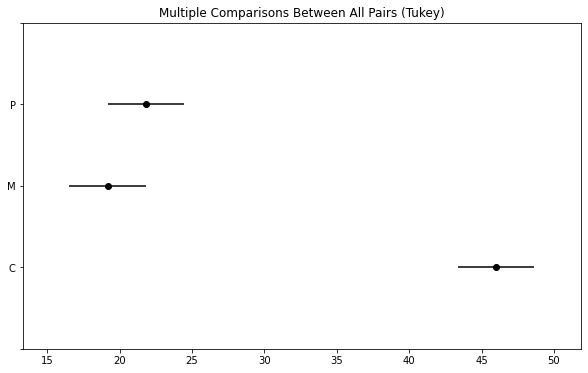

In [78]:
tukey2.plot_simultaneous()
plt.show()